# Chapter 2 Linear Time Series Analysis and Its Applications

In [2]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
from scipy import stats 

## Return Models

In [3]:
da = pd.read_csv(r'data\m-ibm3dx2608.txt', sep='\s+', header=0)
da.head()

,date,ibmrtn,vwrtn,ewrtn,sprtn
0,19260130,-0.010381,0.000724,0.023174,0.022472
1,19260227,-0.024476,-0.033374,-0.053510,-0.043956
2,19260331,-0.115591,-0.064341,-0.096824,-0.059113
3,19260430,0.089783,0.038358,0.032946,0.022688
4,19260528,0.036932,0.012172,0.001035,0.007679


In [4]:
da.iloc[0: 1, :]

,date,ibmrtn,vwrtn,ewrtn,sprtn
0,19260130,-0.010381,0.000724,0.023174,0.022472


In [5]:
sibm = da.iloc[:, 1: 2]
libm = np.log(sibm + 1)
print(sibm, libm)

       ibmrtn
0   -0.010381
1   -0.024476
2   -0.115591
3    0.089783
4    0.036932
..        ...
991 -0.044929
992 -0.039185
993 -0.205113
994 -0.116919
995  0.031373

[996 rows x 1 columns]        ibmrtn
0   -0.010435
1   -0.024781
2   -0.122836
3    0.085979
4    0.036266
..        ...
991 -0.045970
992 -0.039973
993 -0.229555
994 -0.124338
995  0.030891

[996 rows x 1 columns]


In [6]:
sm.stats.acorr_ljungbox(sibm, lags=[5], boxpierce=True, return_df=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
5,3.368222,0.643414,3.35273,0.645779


In [7]:
sm.stats.acorr_ljungbox(libm, lags=[5], boxpierce=True, return_df=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
5,3.523579,0.619823,3.507937,0.622187


In [64]:
dates = pd.date_range('1/1/1926', periods=len(sibm), freq='M')
dates

DatetimeIndex(['1926-01-31', '1926-02-28', '1926-03-31', '1926-04-30',
               '1926-05-31', '1926-06-30', '1926-07-31', '1926-08-31',
               '1926-09-30', '1926-10-31',
               ...
               '2008-03-31', '2008-04-30', '2008-05-31', '2008-06-30',
               '2008-07-31', '2008-08-31', '2008-09-30', '2008-10-31',
               '2008-11-30', '2008-12-31'],
              dtype='datetime64[ns]', length=996, freq='M')

In [65]:
sibm_ts = pd.DataFrame(sibm.values, index=dates)
libm_ts = pd.DataFrame(libm.values, index=dates)
print(sibm_ts, libm_ts)

                   0
1926-01-31 -0.010381
1926-02-28 -0.024476
1926-03-31 -0.115591
1926-04-30  0.089783
1926-05-31  0.036932
...              ...
2008-08-31 -0.044929
2008-09-30 -0.039185
2008-10-31 -0.205113
2008-11-30 -0.116919
2008-12-31  0.031373

[996 rows x 1 columns]                    0
1926-01-31 -0.010435
1926-02-28 -0.024781
1926-03-31 -0.122836
1926-04-30  0.085979
1926-05-31  0.036266
...              ...
2008-08-31 -0.045970
2008-09-30 -0.039973
2008-10-31 -0.229555
2008-11-30 -0.124338
2008-12-31  0.030891

[996 rows x 1 columns]


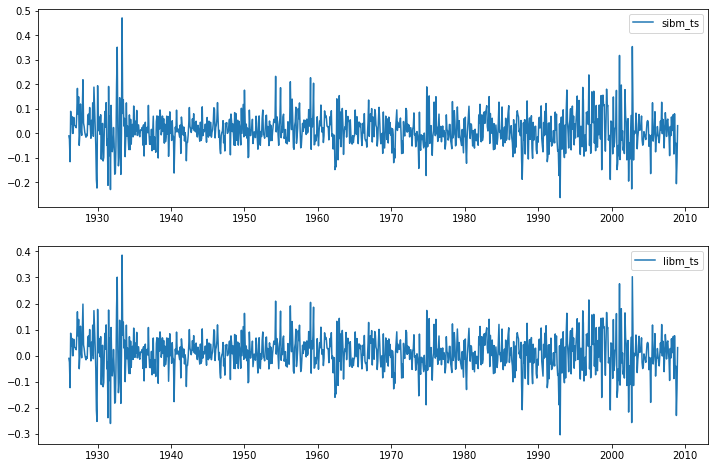

In [66]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
axes[0].plot(sibm_ts, label="sibm_ts")
axes[1].plot(libm_ts, label="libm_ts")
axes[0].legend()
axes[1].legend()
plt.show()

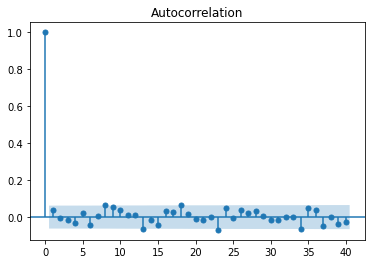

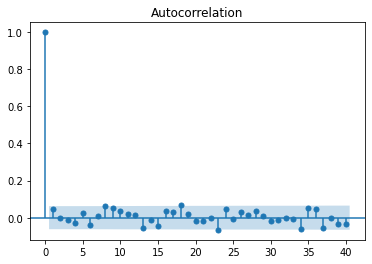

In [67]:
sm.graphics.tsa.plot_acf(sibm_ts, lags=40)
sm.graphics.tsa.plot_acf(libm_ts, lags=40)
plt.show()

## AR(p) Model

In [35]:
gnp = pd.read_csv(r'data\dgnp82.txt', sep='\s+', header=None)
gnp.head()

,0
0,0.00632
1,0.00366
2,0.01202
3,0.00627
4,0.01761


In [55]:
dates = pd.date_range('6/30/1947', periods=len(gnp), freq='3M')
dates

DatetimeIndex(['1947-06-30', '1947-09-30', '1947-12-31', '1948-03-31',
               '1948-06-30', '1948-09-30', '1948-12-31', '1949-03-31',
               '1949-06-30', '1949-09-30',
               ...
               '1988-12-31', '1989-03-31', '1989-06-30', '1989-09-30',
               '1989-12-31', '1990-03-31', '1990-06-30', '1990-09-30',
               '1990-12-31', '1991-03-31'],
              dtype='datetime64[ns]', length=176, freq='3M')

In [56]:
gnp_ts = pd.DataFrame(gnp.values, index=dates, columns=['gnp_return'])
gnp_ts

,gnp_return
1947-06-30,0.00632
1947-09-30,0.00366
1947-12-31,0.01202
1948-03-31,0.00627
1948-06-30,0.01761
...,...
1990-03-31,0.00420
1990-06-30,0.00108
1990-09-30,0.00358
1990-12-31,-0.00399


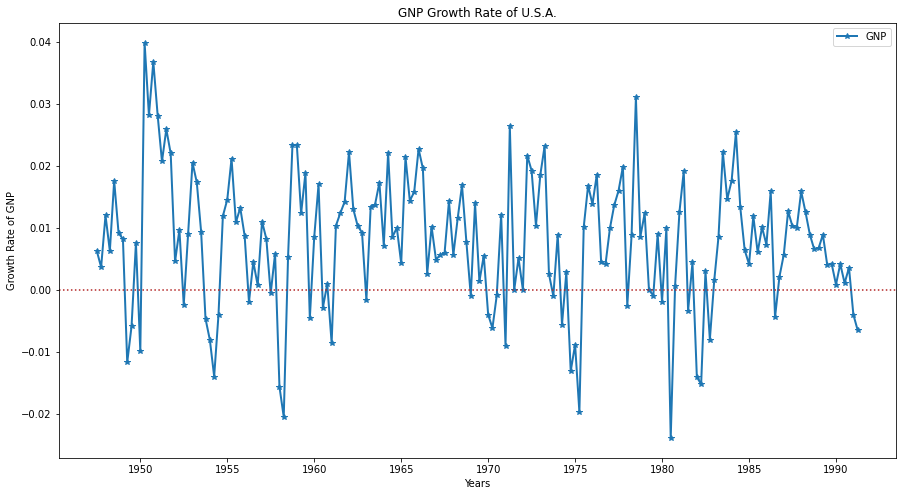

In [69]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title('GNP Growth Rate of U.S.A.')
ax.plot(gnp_ts, linewidth=2, label='GNP', marker="*")
ax.axhline(ls=':', c='Firebrick')
ax.set_xlabel('Years')
ax.set_ylabel('Growth Rate of GNP')
# ax.grid()
ax.legend()

In [83]:
from statsmodels.tsa.ar_model import ar_select_order
mod  = ar_select_order(gnp_ts, maxlag=13, old_names=False, ic='aic', seasonal=True, period=3)
mod.ar_lags

array([1, 2, 3])

In [87]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import AutoRegResults
out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'
# res = AutoReg(gnp_ts, lags=3, old_names=False, seasonal=True, period=3).fit()
res = AutoReg(gnp_ts, lags=3, old_names=False, seasonal=False).fit()
print(out.format(res.aic, res.hqic, res.bic))

AIC: -9.197, HQIC: -9.160, BIC: -9.106


In [88]:
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:             gnp_return   No. Observations:                  176
Model:                     AutoReg(3)   Log Likelihood                 555.080
Method:               Conditional MLE   S.D. of innovations              0.010
Date:                Thu, 11 Mar 2021   AIC                             -9.197
Time:                        14:53:11   BIC                             -9.106
Sample:                    03-31-1948   HQIC                            -9.160
                         - 03-31-1991                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0047      0.001      4.496      0.000       0.003       0.007
gnp_return.L1     0.3509      0.075      4.655      0.000       0.203       0.499
gnp_return.L2     0.1809      0.079     

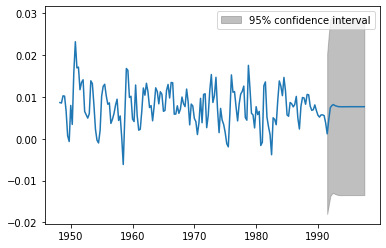

In [89]:
fig = res.plot_predict(0,200)

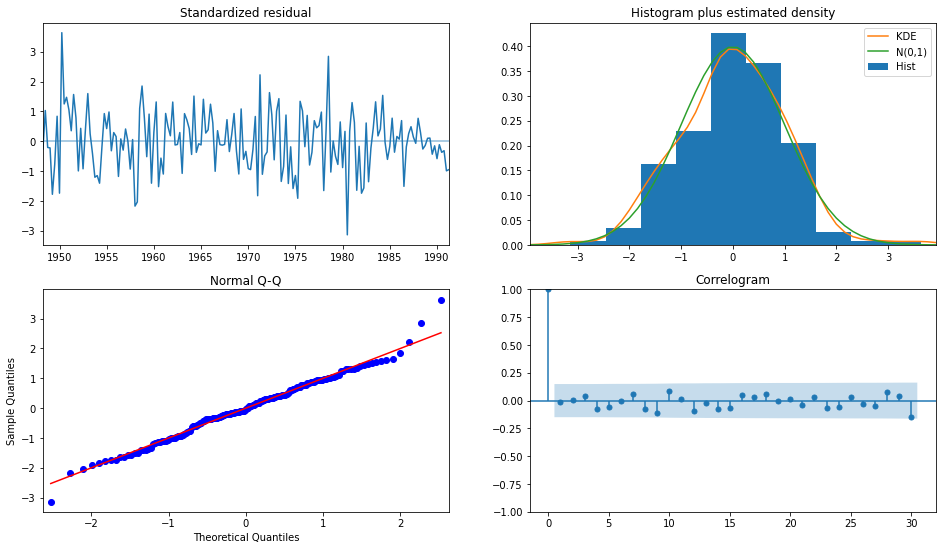

In [86]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [17]:
import pandas_datareader as pdr
data = pdr.get_data_fred('HOUSTNSA', '1959-01-01', '2019-06-01')